# <font color='red'> Linear Models - regression, logistic regression : Supervised learning
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

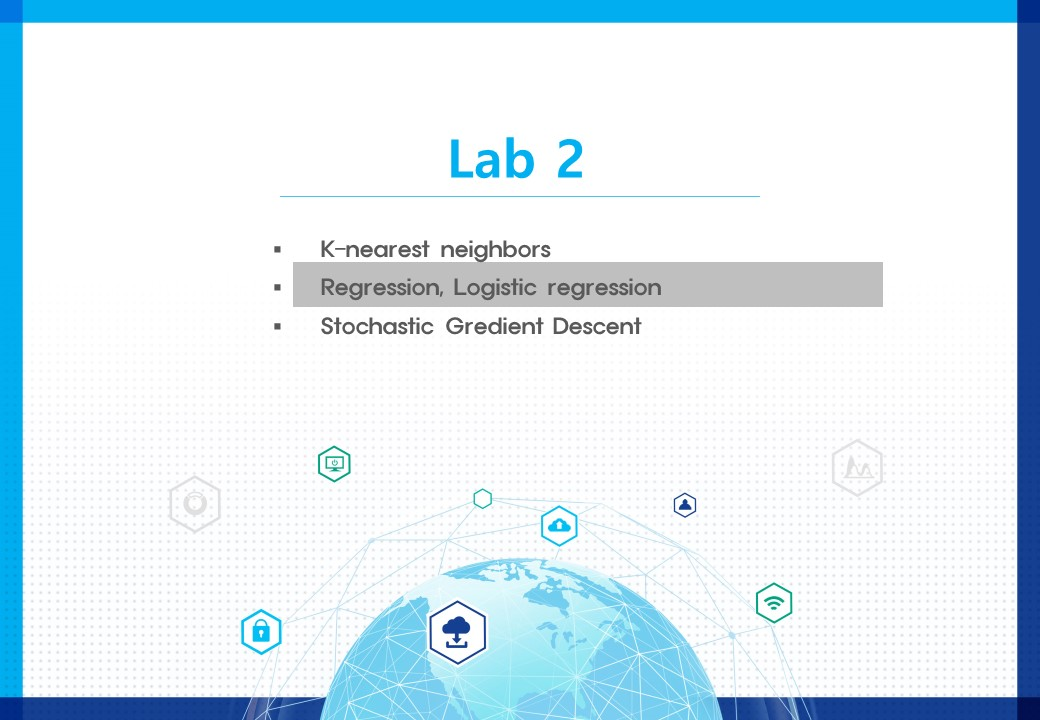

In [4]:
import os
os.chdir('D:/2021_데이터솔루션/발표자료/Python_데이터과학_머신러닝_20210823/')
from IPython.display import Image
width=800; height=500
Image(filename='슬라이드45.jpg', width=width, height=height)

## 단순 회귀 생성(Simple Linear Regression)


$$
y = ax + b
$$


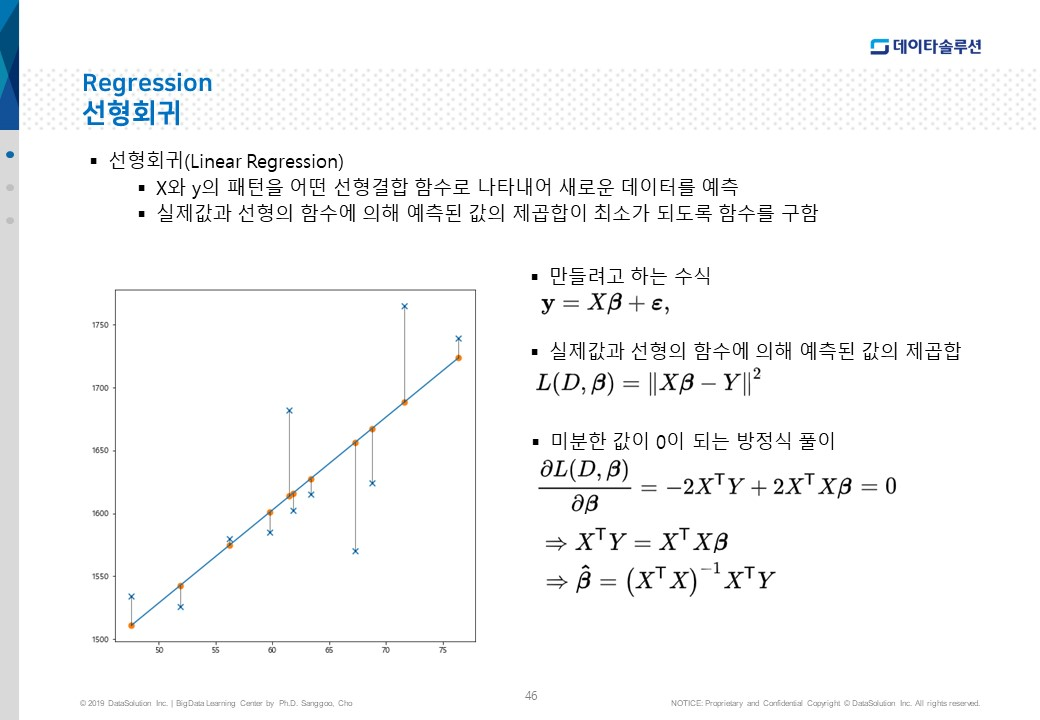

In [5]:
Image(filename='슬라이드46.jpg', width=width, height=height)

In [6]:
from sklearn.linear_model import LinearRegression
np.random.seed(1)
x = 10 * np.random.rand(50)
y = 2 * x - 5 + np.random.randn(50)

model = LinearRegression(fit_intercept=True)
y_pred = model.fit(x.reshape(-1,1), y).predict(x.reshape(-1,1))

In [54]:
model.intercept_

array([-10.89740031])

In [7]:
from sklearn.metrics import mean_squared_error
print(f'Model intercept   : {model.intercept_}')
print(f'Coefficients      : {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y, y_pred)}')

Model intercept   : -4.998577085553202
Coefficients      : [2.02720881]
Mean squared error: 0.818338857026618


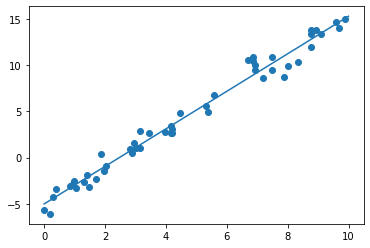

In [8]:
x_line = np.linspace(0, 10, 1000)
y_line_pred = model.predict(x_line.reshape(-1,1))
plt.scatter(x, y)
plt.plot(x_line, y_line_pred)

## 다중 회귀 생성(Multiple Linear Regression)


$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$


In [9]:
np.random.seed(1)
X = 10 * np.random.rand(1000, 3)
y = np.dot(X, [1.5, -2., 1.]) + 0.5 * np.random.randn(1000)

model = LinearRegression(fit_intercept=True)
y_pred = model.fit(X, y).predict(X)

print(f'Model intercept   : {model.intercept_}')
print(f'Coefficients      : {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y, y_pred)}')

Model intercept   : 0.016971515631676315
Coefficients      : [ 1.50978224 -2.00146477  0.99185895]
Mean squared error: 0.24054683075347646


## 로지스틱 회귀분석(Logistic Regression)

### sklearn과 statsmodels api의 비교

In [10]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=5)

In [11]:
model = LinearRegression(fit_intercept=False)
y_pred = model.fit(X, y).predict(X)

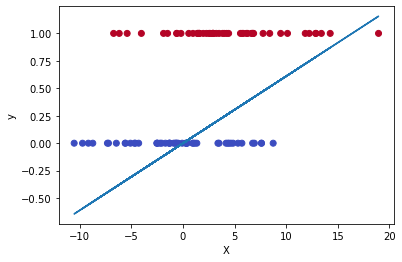

In [12]:
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_pred); plt.ylabel('y'); plt.xlabel('X'); 

In [13]:
from sklearn.metrics import mean_squared_error
print(f'Model intercept   : {model.intercept_}')
print(f'Coefficients      : {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y, y_pred)}')

Model intercept   : 0.0
Coefficients      : [0.06102351]
Mean squared error: 0.36899843155981465


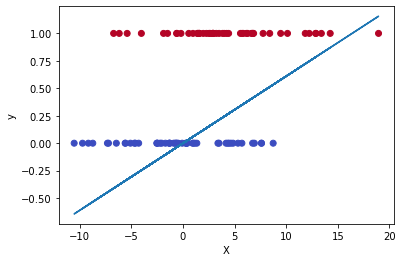

In [14]:
import statsmodels.api as sm
y_pred = sm.OLS(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_pred); plt.ylabel('y'); plt.xlabel('X'); 

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Text(0.5, 0, 'X')

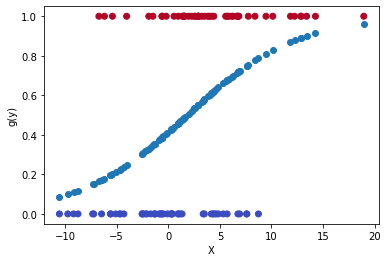

In [16]:
y_pred = model.fit(X,y).predict_proba(X) 
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X[:, 0], y_pred[:,1])
plt.ylabel('g(y)')
plt.xlabel('X')

Optimization terminated successfully.
         Current function value: 0.601782
         Iterations 5


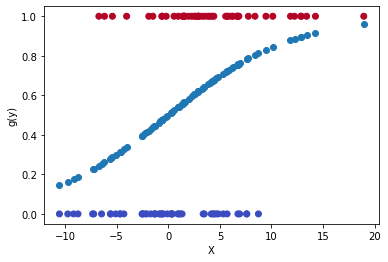

In [17]:
y_predict = sm.Logit(y, X).fit().predict(X) 
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X, y_predict); plt.ylabel('g(y)'); plt.xlabel('X'); 

## scikit-learn API

In [18]:
np.random.seed(1234)
X = 10 * np.random.rand(100); X.shape
y = np.cos(X) + 0.25 * np.random.randn(100)
X = X.reshape(-1,1); X.shape # X = X[:,np.newaxis] 

(100, 1)

In [19]:
from sklearn.linear_model import LinearRegression
y_predict = LinearRegression().fit(X,y).predict(X)

## Basis Function Regression

- One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X, y)
Xfit = np.linspace(0, 10, 100)
yfit = poly_model.predict(Xfit.reshape(-1,1))

In [21]:
X

array([[1.9151945 ],
       [6.22108771],
       [4.37727739],
       [7.85358584],
       [7.79975808],
       [2.72592605],
       [2.76464255],
       [8.01872178],
       [9.58139354],
       [8.75932635],
       [3.5781727 ],
       [5.00995126],
       [6.83462935],
       [7.12702027],
       [3.70250755],
       [5.61196186],
       [5.03083165],
       [0.1376845 ],
       [7.72826622],
       [8.82641191],
       [3.64885984],
       [6.15396178],
       [0.75381242],
       [3.68824006],
       [9.33140102],
       [6.51378143],
       [3.97202578],
       [7.88730143],
       [3.16836122],
       [5.68098653],
       [8.6912739 ],
       [4.36173424],
       [8.02147642],
       [1.43766825],
       [7.04260971],
       [7.04581308],
       [2.18792106],
       [9.24867629],
       [4.42140755],
       [9.09315959],
       [0.59809223],
       [1.84287084],
       [0.47355279],
       [6.74880944],
       [5.9462478 ],
       [5.33310163],
       [0.43324063],
       [5.614

In [22]:
PolynomialFeatures(20).fit_transform(X)

array([[1.00000000e+00, 1.91519450e+00, 3.66796999e+00, ...,
        1.20179934e+05, 2.30167949e+05, 4.40816391e+05],
       [1.00000000e+00, 6.22108771e+00, 3.87019323e+01, ...,
        1.94802192e+14, 1.21188152e+15, 7.53922126e+15],
       [1.00000000e+00, 4.37727739e+00, 1.91605573e+01, ...,
        3.48075328e+11, 1.52362226e+12, 6.66931728e+12],
       ...,
       [1.00000000e+00, 8.19202067e+00, 6.71092027e+01, ...,
        2.76082393e+16, 2.26167267e+17, 1.85276693e+18],
       [1.00000000e+00, 5.71156381e-01, 3.26219611e-01, ...,
        4.18398958e-05, 2.38971235e-05, 1.36489946e-05],
       [1.00000000e+00, 6.69421743e+00, 4.48125470e+01, ...,
        7.28780355e+14, 4.87861416e+15, 3.26585039e+16]])

(-4.0, 4.0)

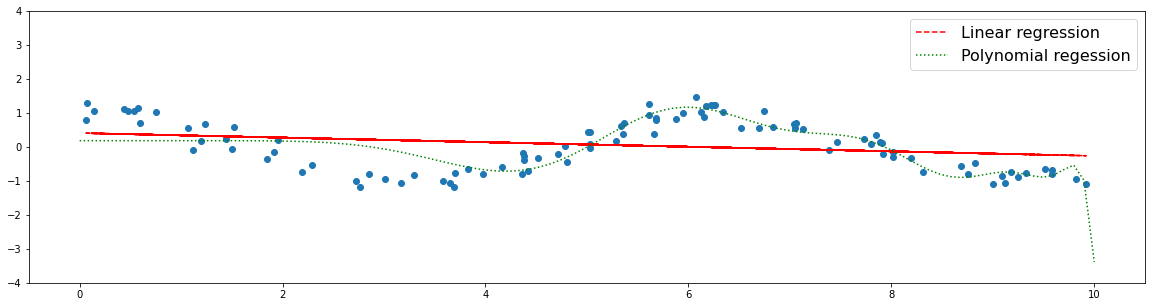

In [23]:
plt.figure(figsize=(20, 5)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict,        'r--', label='Linear regression')
plt.plot(Xfit, yfit,          'g:',  label='Polynomial regession')

plt.legend()
plt.ylim(-4, 4)

## Regularization(Lasso, Ridge)    (L1, L2)

In [24]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit.reshape(-1,1))

ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit.reshape(-1,1))

(-4.0, 4.0)

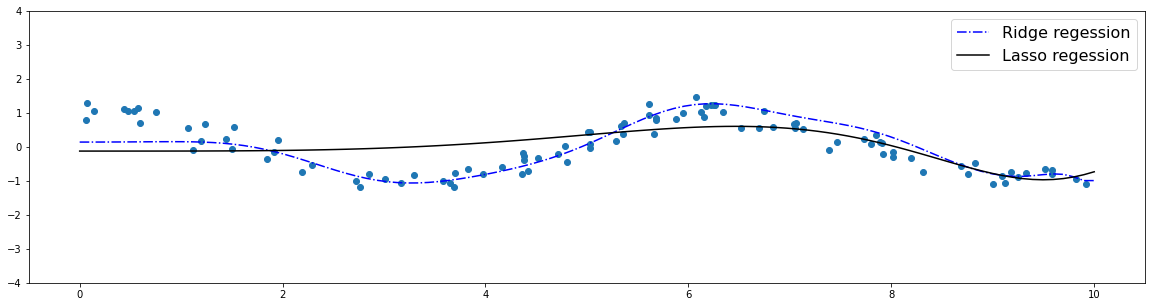

In [25]:
plt.figure(figsize=(20, 5)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(Xfit, predict_ridge, 'b-.', label='Ridge regession')
plt.plot(Xfit, predict_lasso, 'k-',  label='Lasso regession')
plt.legend()
plt.ylim(-4, 4)

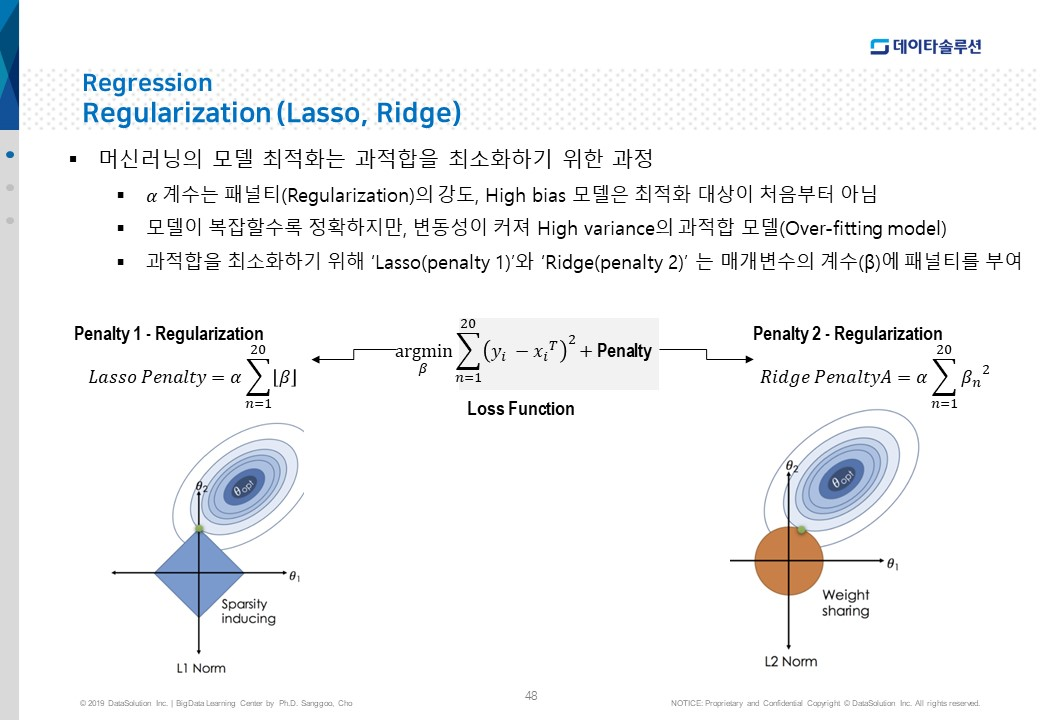

In [50]:
Image(filename='슬라이드48.jpg', width=width, height=height)

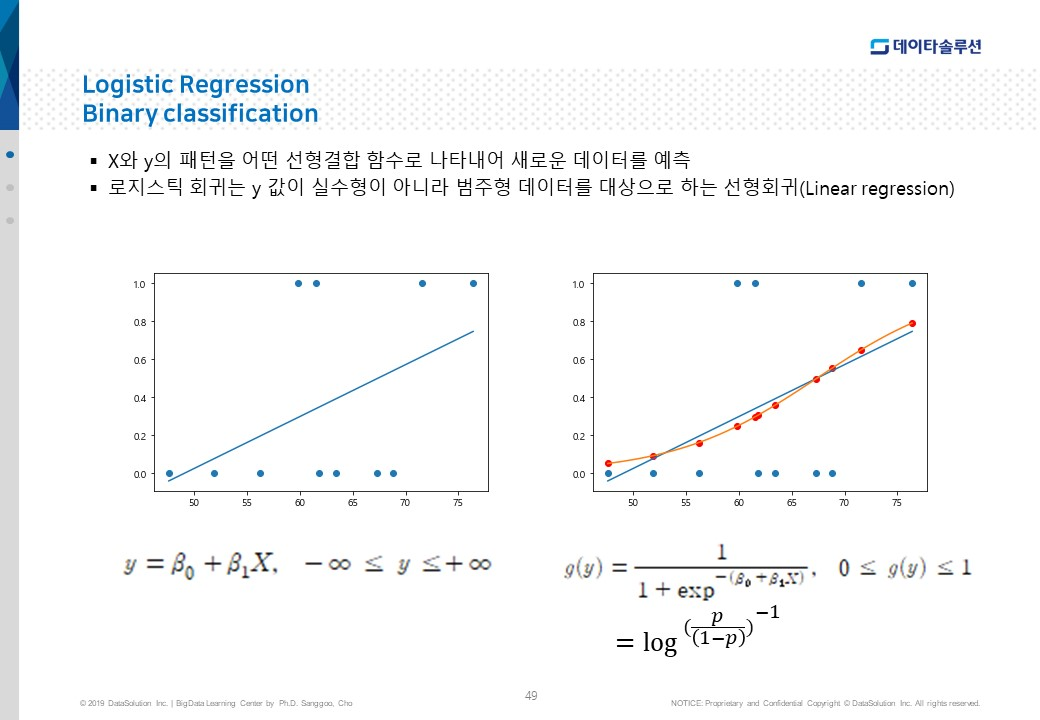

In [51]:
Image(filename='슬라이드49.jpg', width=width, height=height)

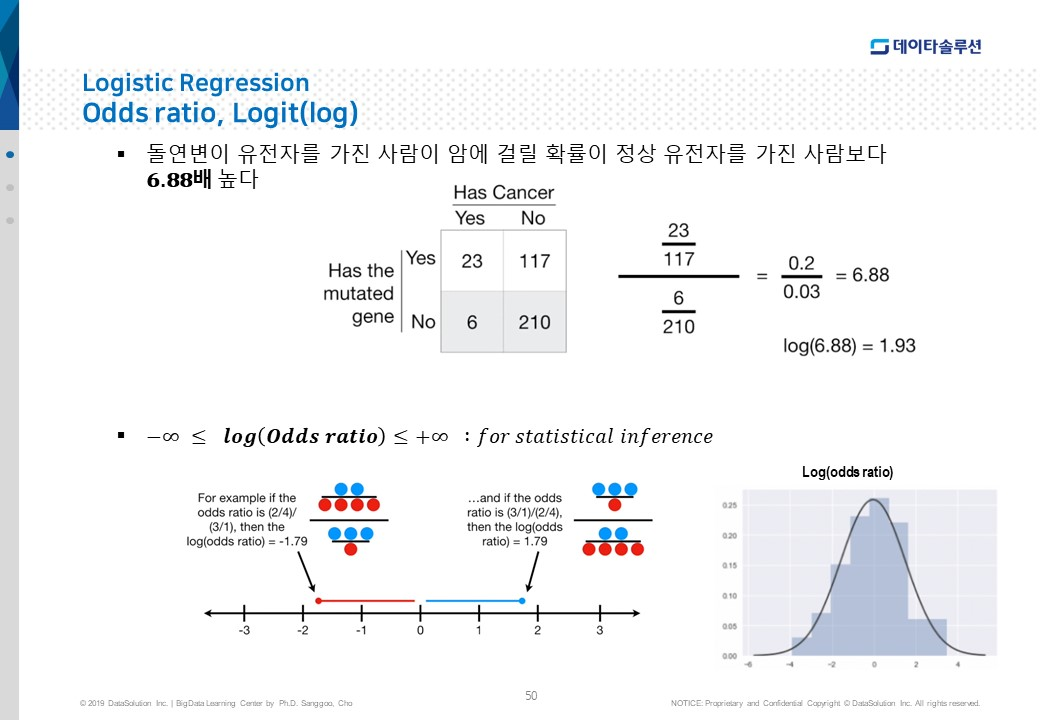

In [52]:
Image(filename='슬라이드50.jpg', width=width, height=height)

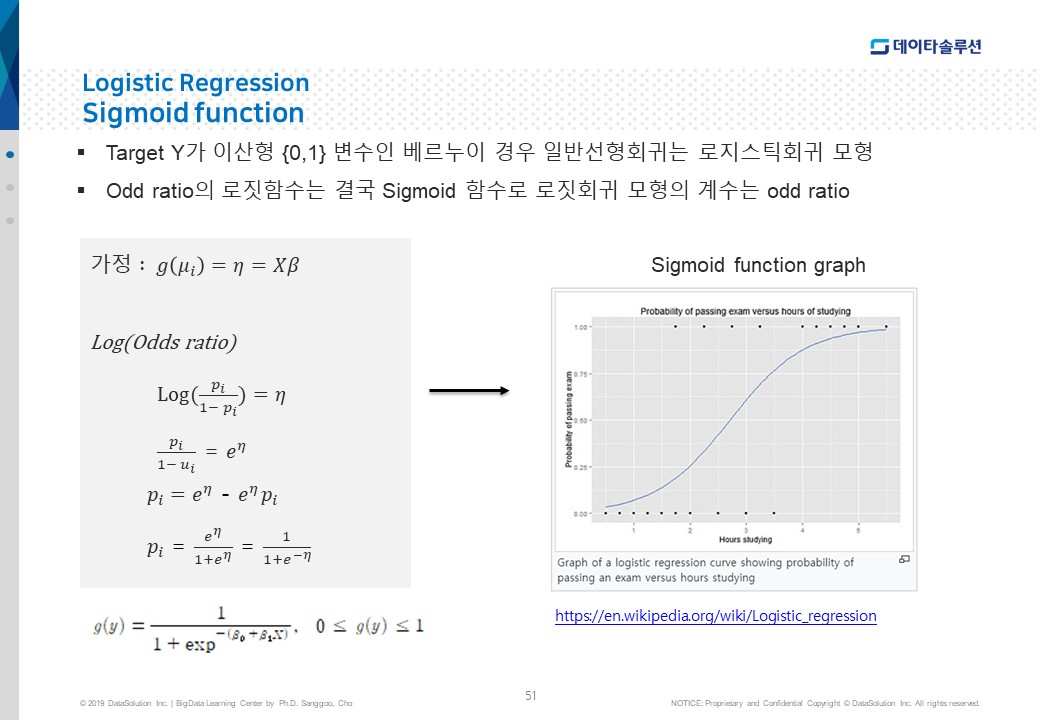

In [53]:
Image(filename='슬라이드51.jpg', width=width, height=height)

##  Digits Classification Exercise

In [26]:
from sklearn.datasets import load_digits
data = load_digits()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df['label'] = df['label'].apply(lambda x: 0 if x != 1 else x)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,0


In [27]:
df.isnull().sum().sum()

0

<AxesSubplot:>

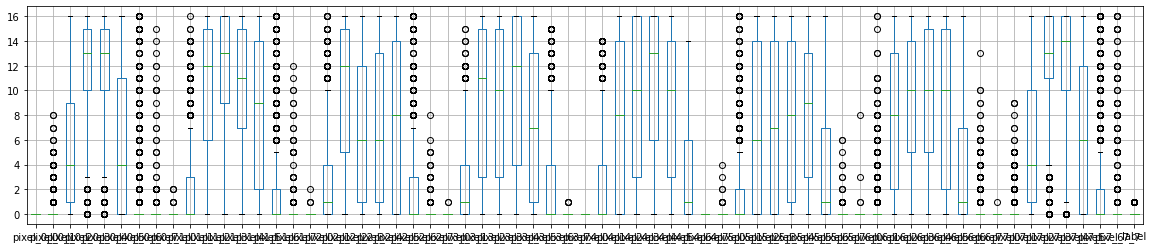

In [28]:
df.boxplot(figsize=(20,4))

<AxesSubplot:>

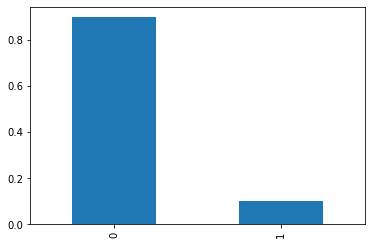

In [29]:
df['label'].value_counts(normalize=True).plot.bar()

In [30]:
X = df.drop('label', axis=1)
X = X/X.max() # 표준화
y = df['label']

<AxesSubplot:>

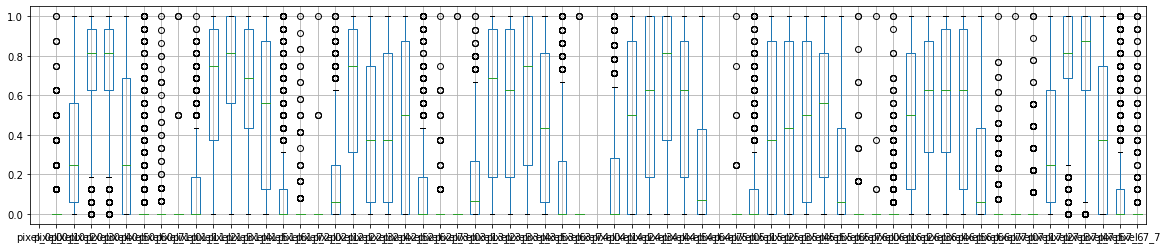

In [31]:
X.boxplot(figsize=(20,4))

#### X.max() --> 0 이 있어 

In [32]:
X.isnull().sum()

pixel_0_0    1797
pixel_0_1       0
pixel_0_2       0
pixel_0_3       0
pixel_0_4       0
             ... 
pixel_7_3       0
pixel_7_4       0
pixel_7_5       0
pixel_7_6       0
pixel_7_7       0
Length: 64, dtype: int64

In [33]:
X.fillna(0, inplace=True)

In [34]:
# 모델 선택
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RandomizedSearchCV
np.random.seed(1357)
kf = KFold(n_splits=3)
model = LogisticRegression(solver='saga', random_state=11)

In [36]:
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
randomized = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
randomized.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=11, solver='saga'),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall_macro')

In [37]:
print('optimal train score: {:.3f}'.format(randomized.best_score_))
print('test score         : {:.3f}'.format(randomized.score(X_test, y_test)))
print('optimal parameters : {}'.format(randomized.best_params_))

optimal train score: 0.956
test score         : 0.981
optimal parameters : {'penalty': 'l2', 'C': 78.47599703514607}


#### solver를 정하지 않으면 'solver': 'lbfgs'

In [38]:
tuned_params  = randomized.best_params_
model = LogisticRegression().set_params(**tuned_params)
model.get_params()

{'C': 78.47599703514607,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### 처음 모델 정의할 때와 동일하게 정의

In [40]:
model = LogisticRegression(random_state=11, solver='saga').set_params(**tuned_params)
model.get_params()

{'C': 78.47599703514607,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 11,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### refit

In [41]:
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[[ 0.00000000e+00 -7.05000941e-01  3.12713246e-01  1.08606253e+00
  -6.62128953e+00  5.54362941e+00 -2.83382806e+00 -2.84934022e-01
  -1.17167053e-01 -6.64497237e+00 -3.31768997e+00 -2.89819778e+00
   1.80429055e+00  1.81868832e+00 -4.24879709e+00 -1.48291027e-01
   3.10227038e+00  1.71628000e+00  1.21278149e+00  7.96492839e+00
   4.50964890e+00 -2.20441070e+00  9.37700028e-01 -1.47064204e-01
   5.27386875e-01 -2.51363988e-01 -5.16921304e-01  2.51063272e+00
   1.23602864e+00  2.00125953e+00 -2.22044683e+00 -1.44961167e-02
   0.00000000e+00 -1.43457142e+00  8.35657236e-01 -1.22859905e+00
   8.80611525e-01 -6.84646552e-01 -3.16131422e+00  0.00000000e+00
  -9.01984182e-02 -4.53185462e+00 -9.29515511e-01  7.59914099e-01
   3.06571240e-01 -2.50757735e+00 -2.91067551e+00 -4.95851455e-02
  -1.36611452e-03 -1.43646456e+00 -9.45107399e-01  1.87405172e+00
   5.20173213e-01  1.21183646e-01 -1.73347677e+00  2.04564484e+00
   0.00000000e+00 -4.92453423e-01 -2.60893321e+00  5.41760248e-01
   1.39628

In [42]:
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
354,0.0,0.125,0.7500,1.0000,0.6250,0.0000,0.0000,0.0,0.0,0.4375,...,0.5000,0.0,0.0,0.222222,0.8750,1.0000,1.0000,0.8125,0.0625,0.0
1718,0.0,0.625,0.9375,1.0000,0.3750,0.0000,0.0000,0.0,0.0,0.6875,...,0.6875,0.0,0.0,0.666667,1.0000,1.0000,1.0000,0.8125,0.1875,0.0
364,0.0,0.000,0.5000,1.0000,1.0000,0.0625,0.0000,0.0,0.0,0.0625,...,0.0000,0.0,0.0,0.000000,0.6875,0.5000,0.0000,0.0000,0.0000,0.0
1566,0.0,0.000,0.6250,1.0000,0.9375,0.4375,0.0000,0.0,0.0,0.3750,...,0.0625,0.0,0.0,0.000000,0.6875,1.0000,1.0000,0.5000,0.0625,0.0
187,0.0,0.000,0.5625,1.0000,0.3125,0.0000,0.0000,0.0,0.0,0.3750,...,0.5000,0.0,0.0,0.000000,0.4375,1.0000,1.0000,0.5000,0.0625,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.0,0.000,0.1875,0.8750,0.6250,0.1875,0.0000,0.0,0.0,0.0000,...,0.7500,0.0,0.0,0.000000,0.4375,0.7500,0.8750,0.8750,0.3750,0.0
1210,0.0,0.000,0.3125,0.7500,1.0000,0.6250,0.0000,0.0,0.0,0.3750,...,0.0000,0.0,0.0,0.000000,0.3125,0.9375,0.2500,0.0000,0.0000,0.0
54,0.0,0.000,0.0000,0.0625,0.8750,0.8750,0.1875,0.0,0.0,0.0000,...,0.1250,0.0,0.0,0.000000,0.0000,0.0625,0.8125,1.0000,0.3125,0.0
823,0.0,0.000,0.3125,0.8750,0.7500,0.3125,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.4375,0.8125,1.0000,0.5000,0.0000,0.0


#### 같은 모델?

In [43]:
(model.predict(X_test) == randomized.predict(X_test)).all()

True

### 코드가 길면 ()

<AxesSubplot:xlabel='variable'>

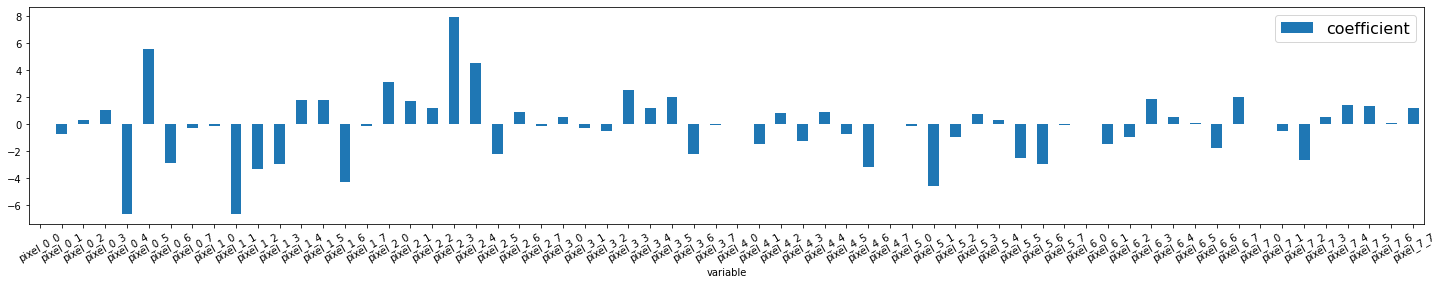

In [44]:
data = zip(X_train.columns, model.coef_.reshape(-1,))
(pd
 .DataFrame(data, columns =['variable', 'coefficient'])
 .set_index('variable')
 .plot.bar(rot='30', figsize=(25,4)))

In [45]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       324
           1       0.92      0.97      0.95        36

    accuracy                           0.99       360
   macro avg       0.96      0.98      0.97       360
weighted avg       0.99      0.99      0.99       360



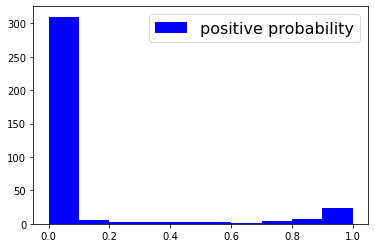

In [46]:
y_proba = model.predict_proba(X_test)
plt.hist(y_proba[:, 1], color ='blue', label='positive probability'); plt.legend()

In [47]:
X_train.shape

(1437, 64)

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

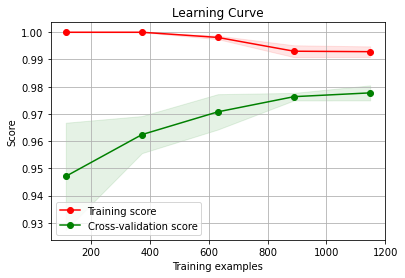

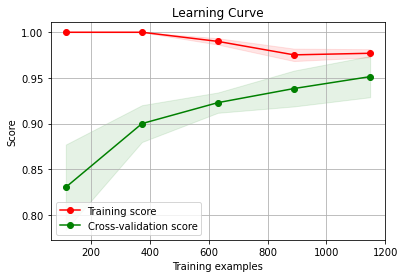

In [48]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='accuracy')
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='recall_macro')

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

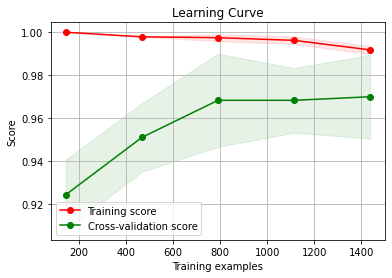

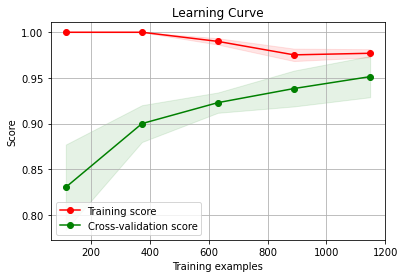

In [49]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X, y, scoring='accuracy')
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='recall_macro')

# End